<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/Mini-Project%20SVMLR%20Classification/(V2)Mini-Project%20SVMLR%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: SVM&LR Classification
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 

## SVM and Logistic Regression Modeling


### Create Models [50 points] 
Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing
logistic regression and linear support vector machines. For many problems, SGD will be
required in order to train the SVM model in a reasonable timeframe.   

### Load and Clean Data Set

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import SGDClassifier

In [10]:
#read data from github repository
#this data was produced from the Iowa Alcohol Dataset 2019 year data
#It was cleansed and transformed in this notebook and exported as a csv to github for use here.
#source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb
# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignments/df1hotmerge2.csv?raw=true'
#data = pd.read_csv(url_dataset)
data = pd.read_csv(url_dataset, nrows=100000)

In [11]:
print(data.shape)
print(list(data.columns))

(100000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [12]:
data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.35499999999999
percentage of whiskey 22.645


In [13]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml',
       'liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

In [14]:
data_final.dtypes

sale_dollars_trans          float64
cost_per_liter_trans        float64
state_bottle_cost_trans     float64
bottles_sold_trans          float64
volume_sold_liters_trans    float64
pack                          int64
bottle_volume_ml              int64
liquor_category_WHISKY        int64
dtype: object

In [15]:
#getting smaller sample size for svm
chosen_idx = np.random.choice(100000, replace=False, size=30000)
df_trimmed = data_final.copy()
df_trimmed = df_trimmed.iloc[chosen_idx]
print(df_trimmed.shape)
print(list(df_trimmed.columns))

(30000, 8)
['sale_dollars_trans', 'cost_per_liter_trans', 'state_bottle_cost_trans', 'bottles_sold_trans', 'volume_sold_liters_trans', 'pack', 'bottle_volume_ml', 'liquor_category_WHISKY']


In [17]:
#for logistic regression
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

#for svm
XSVM = df_trimmed.loc[:, df_trimmed.columns != 'liquor_category_WHISKY']
ySVM = df_trimmed.loc[:, df_trimmed.columns == 'liquor_category_WHISKY']

In [18]:
X.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml
0,4.750136,2.735233,1.348073,2.995732,2.014903,20,375
1,2.574900,5.570632,2.169054,0.000000,-2.995732,8,50
2,5.000585,3.208825,2.803360,1.791759,1.791759,12,1000
3,6.636261,3.745890,3.052585,3.178054,2.890372,6,750
4,5.121819,2.077296,2.231089,2.484907,3.044522,6,1750


## Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics#### Logistic Regression model:

### Models Using Grid Search to compare best possible model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [22]:
#Logisitic regression 10-fold cross-validation 

#Divide data into test and training splits
cv = ShuffleSplit(n_splits=5, test_size=0.10, random_state=0)

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2', 'l1', 'elasticnet']
              ,'C': [0.001, 1, 10, 100]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
              ,'max_iter':[100]
             }

#Create a grid search object using the  

regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  7.4min finished
C:\Users\jjsch\.conda\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 1, 10, 100],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0],
   

In [23]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=10, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
type(regGridSearch)

sklearn.model_selection._search.GridSearchCV

In [25]:
gridresults = pd.DataFrame(regGridSearch.cv_results_)

In [28]:
columns = ['param_solver','param_C', 'param_max_iter', 'class_weight', 'param_penalty', 'mean_test_score', 'rank_test_score']
gridresults = pd.DataFrame(gridresults, columns=columns)

In [29]:
gridresults.sort_values(by=['rank_test_score'], ascending=True).head(20)

,param_solver,param_C,param_max_iter,class_weight,param_penalty,mean_test_score,rank_test_score
78,newton-cg,10,100,NaN,l2,0.918269,1
79,sag,10,100,NaN,l2,0.918269,1
106,saga,100,100,NaN,l2,0.918269,1
109,sag,100,100,NaN,l2,0.918269,1
76,saga,10,100,NaN,l2,0.918269,1
108,newton-cg,100,100,NaN,l2,0.918269,1
111,saga,100,100,NaN,l1,0.918269,1
75,lbfgs,10,100,NaN,l2,0.918262,8
105,lbfgs,100,100,NaN,l2,0.918262,8
45,lbfgs,1,100,NaN,l2,0.918262,8


In [31]:
y_hat = regGridSearch.predict(X_test_scaled) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.9191875
confusion matrix
 [[70559  1118]
 [ 5347  2976]]


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

When to Use ROC vs. Precision-Recall Curves? Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [35]:
# predict probabilities
lr_probs = regGridSearch.predict_proba(X_test_scaled)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.908


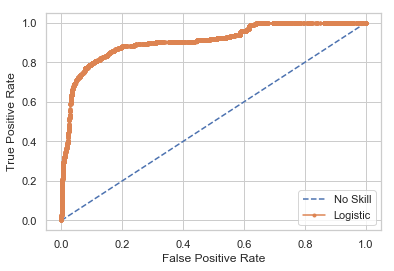

In [36]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

Logistic: f1=0.479 auc=0.653


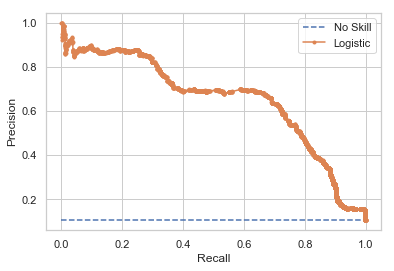

In [39]:
# predict probabilities
lr_probs = regGridSearch.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = regGridSearch.predict(X_test_scaled)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Support Vector Machine Model:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(XSVM, ySVM , test_size=0.2, random_state=0)
columns = X_train.columns
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [44]:
%%time
#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train_scaled 
X_test_scaled 
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', C = 20, random_state=0)
#svclassifier = LinearSVC(C=100)
svclassifier = LinearSVC(random_state=0, C = 10000, tol=1e-5, max_iter=1000, dual=False)
model = svclassifier.fit(X_train_scaled,  y_train)
model

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 431 ms


LinearSVC(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [45]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print("confusion matrix\n")
print(confusion_matrix(y_test, predictions))
print("\nClassification report\n")
print(classification_report(y_test, predictions))
acc = mt.accuracy_score(y_test,predictions)
print("\naccuracy\n", acc )


confusion matrix

[[14666   860]
 [ 2392  2082]]

Classification report

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15526
           1       0.71      0.47      0.56      4474

    accuracy                           0.84     20000
   macro avg       0.78      0.70      0.73     20000
weighted avg       0.83      0.84      0.82     20000


accuracy
 0.8374


So the analysis here is basically telling us what the original statistics of the data looked like, and also what the statistics of the support vectors looked like. We can see that the separation in distributions is not as great as the separation for the original data. This is because the support vectors tend to be instances on the edge of the class boundaries and also instances that are classified incorrectly in the training data.

You can also look at joint plots of the data and see how relationships have changed.

### SGD

In [19]:
%%time
# now divide the data into test and train using scikit learn built-ins

cv = StratifiedShuffleSplit( n_splits=5,test_size=0.8)
# use some compact notation for creating a linear SVM classifier with stochastic descent

regularize_const = 0.01
iterations = 500

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2', average = True, max_iter = 10000, tol=1e-5)


Wall time: 0 ns


In [20]:
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat = log_sgd.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print('Logistic Regression:', acc)

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Logistic Regression: 0.8319


In [21]:
conf

array([[58595,  3289],
       [10159,  7957]], dtype=int64)

In [22]:
%%time
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.01
iterations = 500
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()


Wall time: 0 ns


In [23]:
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat = svm_sgd.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print('SVM:', acc)


C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

SVM: 0.8367375


In [ ]:
#Logisitic regression 10-fold cross-validation 

#Divide data into test and training splits
cv = ShuffleSplit(n_splits=5, test_size=0.10, random_state=0)

regEstimator = SGDClassifier()


parameters = { 
              'alpha' : [0.0001, .001, .01, .1, 1, 10, 100],
              'fit_intercept' : [True, False], 
              'l1_ratio' : [0.0, 0.15, 0.5, 0.75, 0.95],
              'learning_rate' : ['invscaling', 'adaptive', 'optimal', 'constant'],
              'loss' : ['hinge', 'log'], 
              'n_iter_no_change' : [1, 50, 500],
              'penalty' : ['l2'],
              'class_weight' : ['balanced'],
              'eta0' : [ 0.25, 0.5, 0.75, 0.95],
              'power_t' : [0.1, 0.5]    
             }

#Create a grid search object using the  

regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=4 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(scl.transform(X_train_scaled), y_train)

Fitting 5 folds for each of 13440 candidates, totalling 67200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 16.5min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 20.5min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 25.1min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 30.2min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 43.4min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 49.7min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 55.9mi

In [40]:
gridresultsgd = pd.DataFrame(regGridSearch.cv_results_)

In [41]:
gridresultsgd.sort_values(by=['rank_test_score'], ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_weight,param_eta0,param_fit_intercept,param_l1_ratio,param_learning_rate,...,param_power_t,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
960,0.118597,0.021443,0.000902,3.741529e-04,0.001,balanced,0.75,True,0,invscaling,...,0.1,"{'alpha': 0.001, 'class_weight': 'balanced', '...",0.827917,0.846250,0.803333,0.826250,0.828750,0.826500,0.013667,1
322,0.237775,0.030417,0.000998,3.933834e-06,0.0001,balanced,0.75,True,0,invscaling,...,0.1,"{'alpha': 0.0001, 'class_weight': 'balanced', ...",0.832500,0.847500,0.808333,0.813333,0.822917,0.824917,0.014005,2
1021,0.047503,0.015049,0.001001,9.841808e-07,0.001,balanced,0.75,True,0.75,constant,...,0.5,"{'alpha': 0.001, 'class_weight': 'balanced', '...",0.807500,0.833750,0.813333,0.827500,0.823750,0.821167,0.009521,3
622,0.046094,0.006704,0.000899,1.986292e-04,0.0001,balanced,0.95,False,0.75,constant,...,0.1,"{'alpha': 0.0001, 'class_weight': 'balanced', ...",0.815000,0.821667,0.814583,0.818750,0.830000,0.820000,0.005633,4
219,0.240432,0.076050,0.000702,4.015813e-04,0.0001,balanced,0.5,True,0.75,optimal,...,0.5,"{'alpha': 0.0001, 'class_weight': 'balanced', ...",0.827917,0.845417,0.831667,0.836250,0.754583,0.819167,0.032817,5


### Advantages  [10 points] 
Discuss the advantages of each model for each classification task. Does one
type of model offer superior performance over another in terms of prediction accuracy? In
terms of training time or efficiency? Explain in detail. 

#### Logistic Regression
* Advantages - There is less transformation needed in order to make the model return in a reasonable amount of time. Scaler transformation will increase the accuracy, but is not required for peroformance as the model performs well at scale regardless of whether the data is normalized or not. 
* Performance - There are many different setting that allow the model to have the best possible accuracy. These methods can be iterated with a grid search method. 
*  Training Time efficiency is very good at large scales and does not suffer as volume of data increases.

#### Support Vector Machine
* Advantages - From Tan book Chapter 5 - A classification technique that has received considerable attention is support vector machine (SVM). This technique has its roots in statistical learning theory and has shown promising empirical results in many practical applications, from handwritten digit recognition to text categorization. SVM also works very well with high-dimensional data and avoids the curse of dimensionality problem. Another unique aspect of this approach is that it represents the decision boundary using a subset of the training examples, known as the support vectors.  
 However, in order to get high accuracy scaling and high penalties must be set to achieve accuracy with unbalanced data. 
* Performance - Changing the cost to value 1000, after previously using 1, 10, and 100 the performance of prediciton accuracy improves over that of logistic regession.  In order to get a result in a similiar amount of time as logistic regression accuracy is sacrficed. 
* Training Time
    * Slow with large data volume and features
    * Transformation of data helps
    * Very slow with high cost.

#### Stochastic Gradiant Descent
* Advantages
* Performance
   
    

#### Conclusion
The logistic regression provides a way to quickly get to a model, though has less accuracy when compared to SVM.  SVM is very accurate while its performance degrades very quickly with large volumes of data with rows and also with a large number of features. 


###  Interpret  [30 points] 
Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important? 

The two fields "Average of cost_per_liter_trans" and "Average of state_bottle_cost_trans" seem to have the highest coeficients on the logistic regression model. 

Type	     Average of cost_per_liter_trans	Average of state_bottle_cost_trans
Not Whiskey	 2.675545886	                    1.999205623
Whiskey      3.545918698	                    2.871239458

Add a t-test to show they are significantly different averages? 

The model seems to point out that price is the largest differentiator of the available characteristics. Whiskey is more expensive than other liquors. A higher cost per bottle can be used to identify whether a trancation was Whiskey or not. Other numeric features that are present represent bottle size and quanities of bottles sold. Since bottle sizes are fairly standard across the different types of liquors and quantity sold are well balanced across the liquor types and Whiskey is in the middle of the pack for these measures they do not have as much impact.

In [ ]:
# interpret the weights
# iterate over the coefficients
weights2 = logisticRegr.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

In [ ]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(logisticRegr.coef_[0],index=X.columns)
weights.plot(kind='bar')
plt.show()

### Insight into the data [10 points]
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [0]:
#view support vectors
model.support_vectors_

array([[ 0.04172852,  0.3721708 ,  1.1229617 , ..., -0.66089127,
        -0.70389697, -0.26280584],
       [ 0.68132163,  0.0737954 ,  0.68644563, ...,  0.13752377,
        -0.02330599, -0.26280584],
       [ 0.89149549,  0.04219618,  0.62906725, ...,  0.34659634,
        -0.70389697,  0.27676159],
       ...,
       [ 1.02543744,  0.39064988,  1.14532376, ...,  0.13752377,
        -0.70389697, -0.26280584],
       [ 0.19106698, -0.39877606, -0.7808375 , ...,  0.64126757,
        -0.02330599, -0.26280584],
       [ 0.68979404,  0.08020147,  0.69774358, ...,  0.13752377,
        -0.70389697, -0.26280584]])

In [0]:
# View indicies of support vectors
model.support_

array([    0,     9,    11, ..., 79980, 79984, 79987], dtype=int32)

This chooses all the misclassified items as a support vectors.

In [0]:
#view number of support vectors for each class
model.n_support_

array([14457, 14435], dtype=int32)

We used 14,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

[[-0.61779238  0.01725721 -0.26736576  1.74130624  0.93580436 -0.34449688
   0.05279718 -0.32864875]]


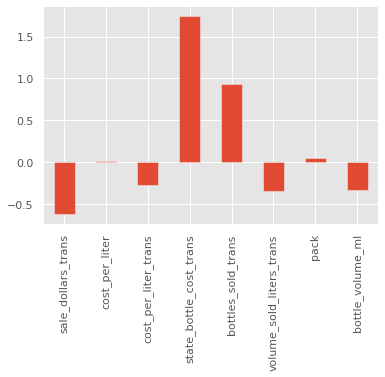

In [0]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(model.coef_)
weights3 = pd.Series(model.coef_[0],index=X_train.columns)
weights3.plot(kind='bar')

In [32]:
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.87355
[[14485  1041]
 [ 1488  2986]]
